In [23]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [24]:
df = pd.read_csv('../data/io_preliminary_results_2.csv')

In [25]:
df

,brightness,brightness_unc,gaussian_width,gaussian_width_unc,int_wv,obs_line_center,obs_line_center_unc
0,9.567195e-19,5.050943e-20,0.182068,0.004037,1208.850,1208.986858,0.009198
1,7.399353e-18,2.736936e-18,0.083925,0.030241,1211.212,1210.706342,0.259752
2,-3.430411e-18,9.285372e-20,0.053892,0.001337,1211.380,1211.368663,0.002410
3,-1.415385e-17,2.320230e-19,0.049160,0.000600,1212.795,1212.915104,0.000826
4,-9.399315e-18,1.625187e-19,0.035978,0.000423,1218.595,1218.616261,0.000504


In [26]:
df_wv = df['int_wv']
df_obs = df['obs_line_center']

In [27]:
df_diff = df_wv-df_obs
df_diff

0   -0.136858
1    0.505658
2    0.011337
3   -0.120104
4   -0.021261
dtype: float64

Let's see if we can tell how much the lines shifted based on the MCMC process which also predicts a center wavelength.

0.047754328375049226
0.2358062061275039


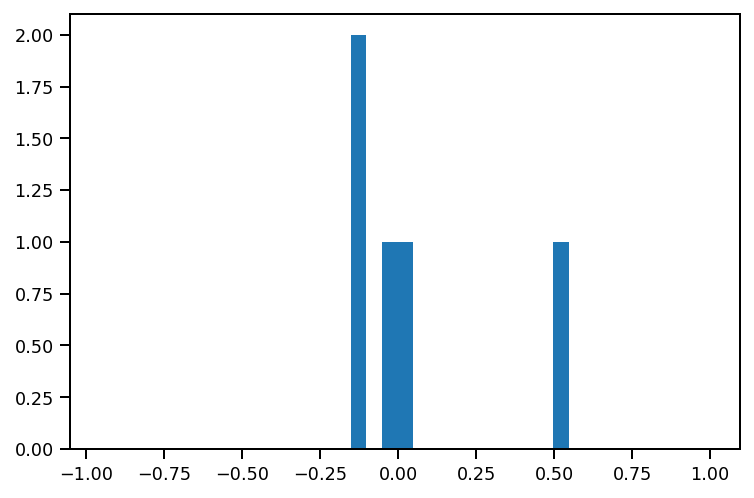

In [28]:
diff_mean = np.mean(df_diff)
diff_std = np.std(df_diff)
plt.hist(df_diff, bins = np.arange(diff_mean-1, diff_mean+1, 0.05));
print(diff_mean)
print(diff_std)